<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/TF2.x_TFDATA_MLinTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [4]:
tf.__version__

'2.0.0'

# TensorFlow Data

In [5]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco2014',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eurosat',
 'fashion_mnist',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imagenet_resized',
 'imdb_reviews',
 'iris',
 '

In [60]:
rps_builder = tfds.builder("rock_paper_scissors")

<_OptionsDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>

In [69]:
rps_builder.info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=1.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    urls=['http://laurencemoroney.com/rock-paper-scissors-dataset'],
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [83]:
print(rps_builder.info.as_json)

{
  "citation": "@ONLINE {rps,\nauthor = \"Laurence Moroney\",\ntitle = \"Rock, Paper, Scissors Dataset\",\nmonth = \"feb\",\nyear = \"2019\",\nurl = \"http://laurencemoroney.com/rock-paper-scissors-dataset\"\n}\n",
  "description": "Images of hands playing rock, paper, scissor game.",
  "downloadChecksums": {
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip": "c27ab9fa43ce40b2e453de711365b477f4424586edf0388116674fd320f07503",
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip": "c2403444395842ad04c53612bad54b574443eae17a0723117a2ff87b9d72194f"
  },
  "location": {
    "urls": [
      "http://laurencemoroney.com/rock-paper-scissors-dataset"
    ]
  },
  "name": "rock_paper_scissors",
  "schema": {
    "feature": [
      {
        "name": "image",
        "shape": {
          "dim": [
            {
              "size": "300"
            },
            {
              "size": "300"
            },
            {
              

In [72]:
rps_builder.download_and_prepare()
rps_train_data = rps_builder.as_dataset(split="train", as_supervised=True)
rps_train_data

<_OptionsDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>

In [73]:
type(rps_train_data)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'> (300, 300, 3)
The label for same is 1


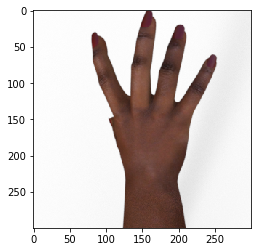

In [74]:
for data in rps_train_data.shuffle(100).take(1):
    image, label = data[0], data[1]
print(type(image), type(label), image.numpy().shape)
print(f"The label for same is {label}")
plt.imshow(image.numpy())
plt.show()

In [0]:
rps_test_data, rps_test_info = tfds.load("rock_paper_scissors", split="test", with_info=True)

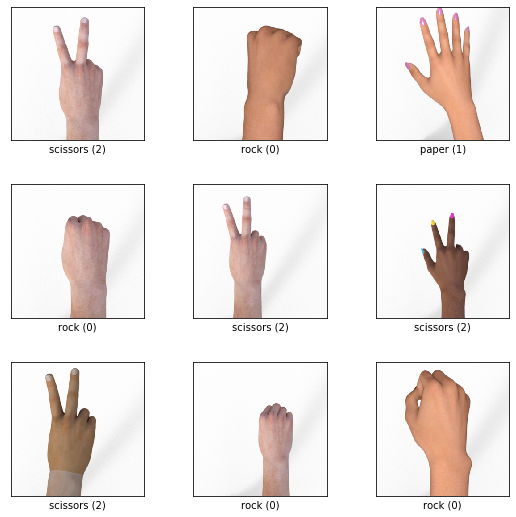

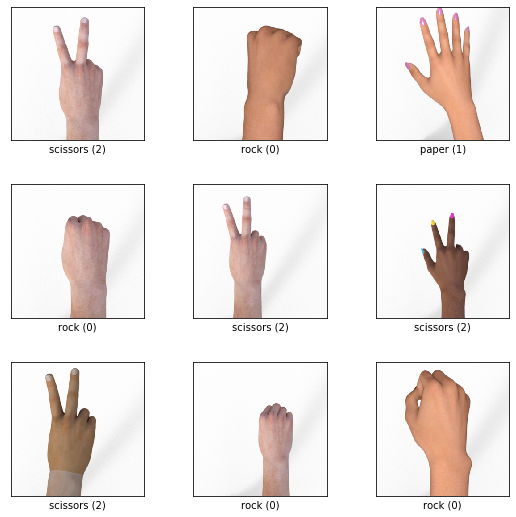

In [77]:
tfds.show_examples(rps_test_info, rps_test_data)

# TensorFlow Migration

In [2]:
# Please upload the sample tf 1.x code 
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [11]:
! cat tf1_x.py

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images_norm = train_images/256
test_images_norm = test_images/256

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images_norm, train_labels, epochs=5)

loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



import matplotlib.pyplot as plt
import numpy as np

image_id = np.random.randint(len(test_images))
print("Image ID {} - {}".format(image_id, test_labels[image_id]))
plt.imshow(test_images[image_id], cmap='Greys')

image_data = (test_ima

In [5]:
! tf_upgrade_v2 --help

usage: tf_upgrade_v2 [-h] [--infile INPUT_FILE] [--outfile OUTPUT_FILE]
                     [--intree INPUT_TREE] [--outtree OUTPUT_TREE]
                     [--copyotherfiles COPY_OTHER_FILES] [--inplace]
                     [--reportfile REPORT_FILENAME] [--mode {DEFAULT,SAFETY}]
                     [--print_all]

Convert a TensorFlow Python file from 1.x to 2.0

Simple usage:
  tf_upgrade_v2.py --infile foo.py --outfile bar.py
  tf_upgrade_v2.py --infile foo.ipynb --outfile bar.ipynb
  tf_upgrade_v2.py --intree ~/code/old --outtree ~/code/new

optional arguments:
  -h, --help            show this help message and exit
  --infile INPUT_FILE   If converting a single file, the name of the file to
                        convert
  --outfile OUTPUT_FILE
                        If converting a single file, the output filename.
  --intree INPUT_TREE   If converting a whole tree of files, the directory to
                        read from (relative or absolute).
  --outtree OUTPUT_TREE


In [10]:
! tf_upgrade_v2 --infile tf1_x.py --outfile tf2_x.py --print_all

INFO line 16:24: Renamed 'tf.train.AdamOptimizer' to 'tf.compat.v1.train.AdamOptimizer'
WARNING line 41:0: *.save requires manual check. (This warning is only applicable if the code saves a tf.Keras model) Keras model.save now saves to the Tensorflow SavedModel format by default, instead of HDF5. To continue saving to HDF5, add the argument save_format='h5' to the save() function.
INFO line 49:27: Renamed 'tf.train.AdamOptimizer' to 'tf.compat.v1.train.AdamOptimizer'
TensorFlow 2.0 Upgrade Script
-----------------------------
Converted 1 files
Detected 1 issues that require attention
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
File: tf1_x.py
--------------------------------------------------------------------------------
tf1_x.py:41:0: WARNING: *.save requires manual check. (This warning is only applicable if the code saves a tf.Keras model) Keras model.save now saves t

In [12]:
! cat tf2_x.py

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images_norm = train_images/256
test_images_norm = test_images/256

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images_norm, train_labels, epochs=5)

loss, accuracy = model.evaluate(test_images_norm, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



import matplotlib.pyplot as plt
import numpy as np

image_id = np.random.randint(len(test_images))
print("Image ID {} - {}".format(image_id, test_labels[image_id]))
plt.imshow(test_images[image_id], cmap='Greys')

image_data =

# Tree Based Modeling in TensorFlow

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.autograph.set_verbosity(0)
# tf.get_logger().setLevel('INFO')
from pprint import pprint
tf.__version__

'2.0.0'

In [0]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [32]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [0]:
fc = tf.feature_column
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [29]:
# Different type of Feature Engineering capabilities through tf.feature_column
[i for i in tf.feature_column.__dir__() if not i.startswith("_")]

['bucketized_column',
 'categorical_column_with_hash_bucket',
 'categorical_column_with_identity',
 'categorical_column_with_vocabulary_file',
 'categorical_column_with_vocabulary_list',
 'crossed_column',
 'embedding_column',
 'indicator_column',
 'make_parse_example_spec',
 'numeric_column',
 'shared_embeddings',
 'weighted_categorical_column',
 'sequence_categorical_column_with_hash_bucket',
 'sequence_categorical_column_with_identity',
 'sequence_categorical_column_with_vocabulary_file',
 'sequence_categorical_column_with_vocabulary_list',
 'sequence_numeric_column']

In [61]:
# Example of ONE HOT ENCODING
sample = dict(dftrain.head(1))
class_fun = tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list("class", dftrain["class"].unique().tolist()))
class_fun
tf.keras.layers.DenseFeatures([class_fun])({"class": dftrain["class"]}).numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
def one_hot_cat_column(feature_name, vocab):
  return tf.feature_column.indicator_column(
      tf.feature_column.categorical_column_with_vocabulary_list(feature_name,
                                                                vocab))
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  # Need to one-hot encode categorical features.
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(one_hot_cat_column(feature_name, vocabulary))
  
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,
                                                          dtype=tf.float32))

In [0]:
# Use entire batch since this is such a small dataset.
NUM_EXAMPLES = len(y_train)

def make_input_fn(X, y, n_epochs=None, shuffle=True):
  def input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
    if shuffle:
      dataset = dataset.shuffle(NUM_EXAMPLES)
    # For training, cycle thru dataset as many times as need (n_epochs=None).    
    dataset = dataset.repeat(n_epochs)
    # In memory training doesn't use batching.
    dataset = dataset.batch(NUM_EXAMPLES)
    return dataset
  return input_fn

In [0]:
# Training and evaluation input functions.
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, shuffle=False, n_epochs=1)

In [93]:
linear_est = tf.estimator.LinearClassifier(feature_columns)

# Train model.
linear_est.train(train_input_fn, max_steps=100)

# Evaluation.
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp30yb1t8h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2f82b48320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to ru

In [94]:
result

{'accuracy': 0.7651515,
 'accuracy_baseline': 0.625,
 'auc': 0.8328436,
 'auc_precision_recall': 0.78963065,
 'average_loss': 0.47890806,
 'global_step': 100,
 'label/mean': 0.375,
 'loss': 0.47890806,
 'precision': 0.7032967,
 'prediction/mean': 0.35079017,
 'recall': 0.64646465}

In [95]:
n_batches = 1

params = {
  'n_trees': 50,
  'max_depth': 3,
  'n_batches_per_layer': n_batches,
  'center_bias': True
}
est = tf.estimator.BoostedTreesClassifier(feature_columns,
                                          **params)

# The model will stop training once the specified number of trees is built, not 
# based on the number of steps.
est.train(train_input_fn, max_steps=100)

# Eval.
result = est.evaluate(eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9ai_aw78', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2f83e655f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [96]:
result

{'accuracy': 0.8068182,
 'accuracy_baseline': 0.625,
 'auc': 0.8666055,
 'auc_precision_recall': 0.84912777,
 'average_loss': 0.42154858,
 'global_step': 100,
 'label/mean': 0.375,
 'loss': 0.42154858,
 'precision': 0.7553192,
 'prediction/mean': 0.38494378,
 'recall': 0.7171717}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9ai_aw78/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


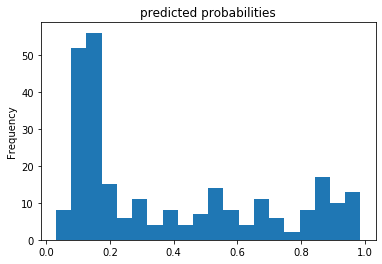

In [110]:
pred_dicts = list(est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')
plt.show()

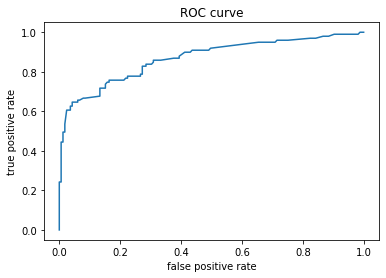

In [111]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

### Interpratation of Model 

In [76]:
pred_dicts = list(est.experimental_predict_with_explanations(eval_input_fn))
df_dfc = pd.DataFrame([pred['dfc'] for pred in pred_dicts])

INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpo6ha0dkw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2f84192c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph

In [77]:
df_dfc.head()

,age,sex,class,deck,embark_town,fare,n_siblings_spouses,parch,alone
0,-0.076765,-0.072686,-0.045972,-0.041967,-0.013301,-0.008468,0.003165,0.000271,0.0
1,-0.004076,-0.109549,0.035165,0.035385,-0.008852,-0.031729,0.006052,0.000533,0.0
2,-0.013335,0.146291,0.220637,-0.008050,-0.003681,0.144796,0.002873,0.000242,0.0
3,-0.032502,0.135762,0.206056,0.004292,-0.013571,0.135987,0.003645,0.000313,0.0
4,-0.050804,-0.080670,-0.052444,0.008782,-0.017384,-0.011153,0.004189,0.000361,0.0


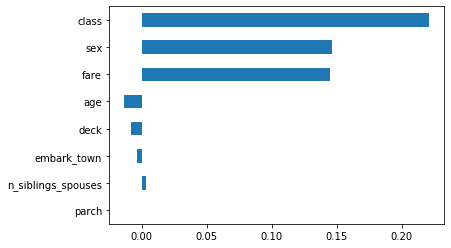

In [89]:
# DFC - Directional feature Contribution 
ID = np.random.choice(range(1, 100))
example = df_dfc.iloc[ID]  
# TOP_N = 8  # View top 8 features.
sorted_ix = example.abs().sort_values()[-TOP_N:].index
ax = example[sorted_ix].plot(kind='barh')

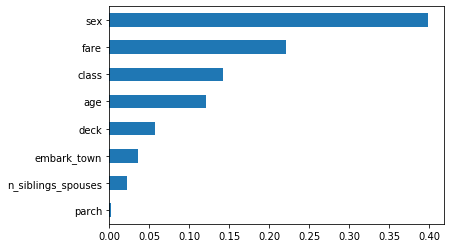

In [90]:
# model level interpretability 
importances = est.experimental_feature_importances(normalize=True)
df_imp = pd.Series(importances)

# Visualize importances.
N = 8
ax = (df_imp.iloc[0:N][::-1]
    .plot(kind='barh'))